<a href="https://colab.research.google.com/github/Liburn-Krasniqi/Regression-Analysis-for-Body-Fat-Percentage-Prediction/blob/main/Project_A_ICT_AI_v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Body Fat Percentage Estimation Project**

## **Project Description**  
The goal of this project is to estimate **body fat percentage (BF%)** using a set of easily measurable physical indicators, such as **age, weight, height,** and **various body circumference measurements**.  

We will analyze the relationships between these independent variables to develop a **predictive regression model** for estimating **BF%**. The dataset provided contains pre-recorded measurements, so no additional data collection is required.

---

## **Key Research Questions**
1. **Which indicators provide a reliable estimation of BF%?**  
   - Identify the most significant independent variables.  
2. **What is the best regression model for predicting BF%?**  
   - Compare different regression models to determine the best fit.  
3. **How do individual variables contribute to the model’s accuracy?**  
   - Measure the impact of each independent variable on **R²**, evaluating how much it improves the prediction.

---

## **Deliverables**
- **Python Code**  
  - Implements data preprocessing, feature selection, and model evaluation.  
- **Experimental Analysis**  
  - Compare different algorithms and methods to assess prediction accuracy.  
- **Short Report (≈10 pages)**  
  - **Approach**: Explanation of methodology and modeling techniques.  
  - **Code Overview**: Summary of key functions and logic.  
#  - **Results**: Tables, figures, and insights from model evaluations.

In [204]:
# mount drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Importing all libraries and Loading dataset

In [373]:
# all imports
import math
import joblib
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as smt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [357]:
# Importing the dataset
dataset = "/content/drive/MyDrive/Artificial_intelligence/PercentBodyFat.xlsx"

# Read dataset to pandas dataframe
df = pd.read_excel(dataset)

# 2. Understanding the dataset

In [273]:
df.head()

PercentBodyFat   Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0            12.3  23.0  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1             6.1  22.0  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2            25.3  22.0  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3            10.4  26.0  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4            28.7  24.0  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PercentBodyFat  252 non-null    float64
 1   Age             252 non-null    float64
 2   Weight          252 non-null    float64
 3   Height          252 non-null    float64
 4   Neck            252 non-null    float64
 5   Chest           252 non-null    float64
 6   Abdomen         252 non-null    float64
 7   Hip             252 non-null    float64
 8   Thigh           252 non-null    float64
 9   Knee            252 non-null    float64
 10  Ankle           252 non-null    float64
 11  Biceps          252 non-null    float64
 12  Forearm         252 non-null    float64
 13  Wrist           252 non-null    float64
dtypes: float64(14)
memory usage: 27.7 KB


In [203]:
#Check for null values
df.isnull().sum()

PercentBodyFat    0
Age               0
Weight            0
Height            0
Neck              0
Chest             0
Abdomen           0
Hip               0
Thigh             0
Knee              0
Ankle             0
Biceps            0
Forearm           0
Wrist             0
dtype: int64

# 3. Exploratory Data Analysis

We can see the data is some imperial(american measurement system) some metric, since we are metric users I will convert the data to metric,

but lets try to get a better sense of what the dataset holds through a pairplot:

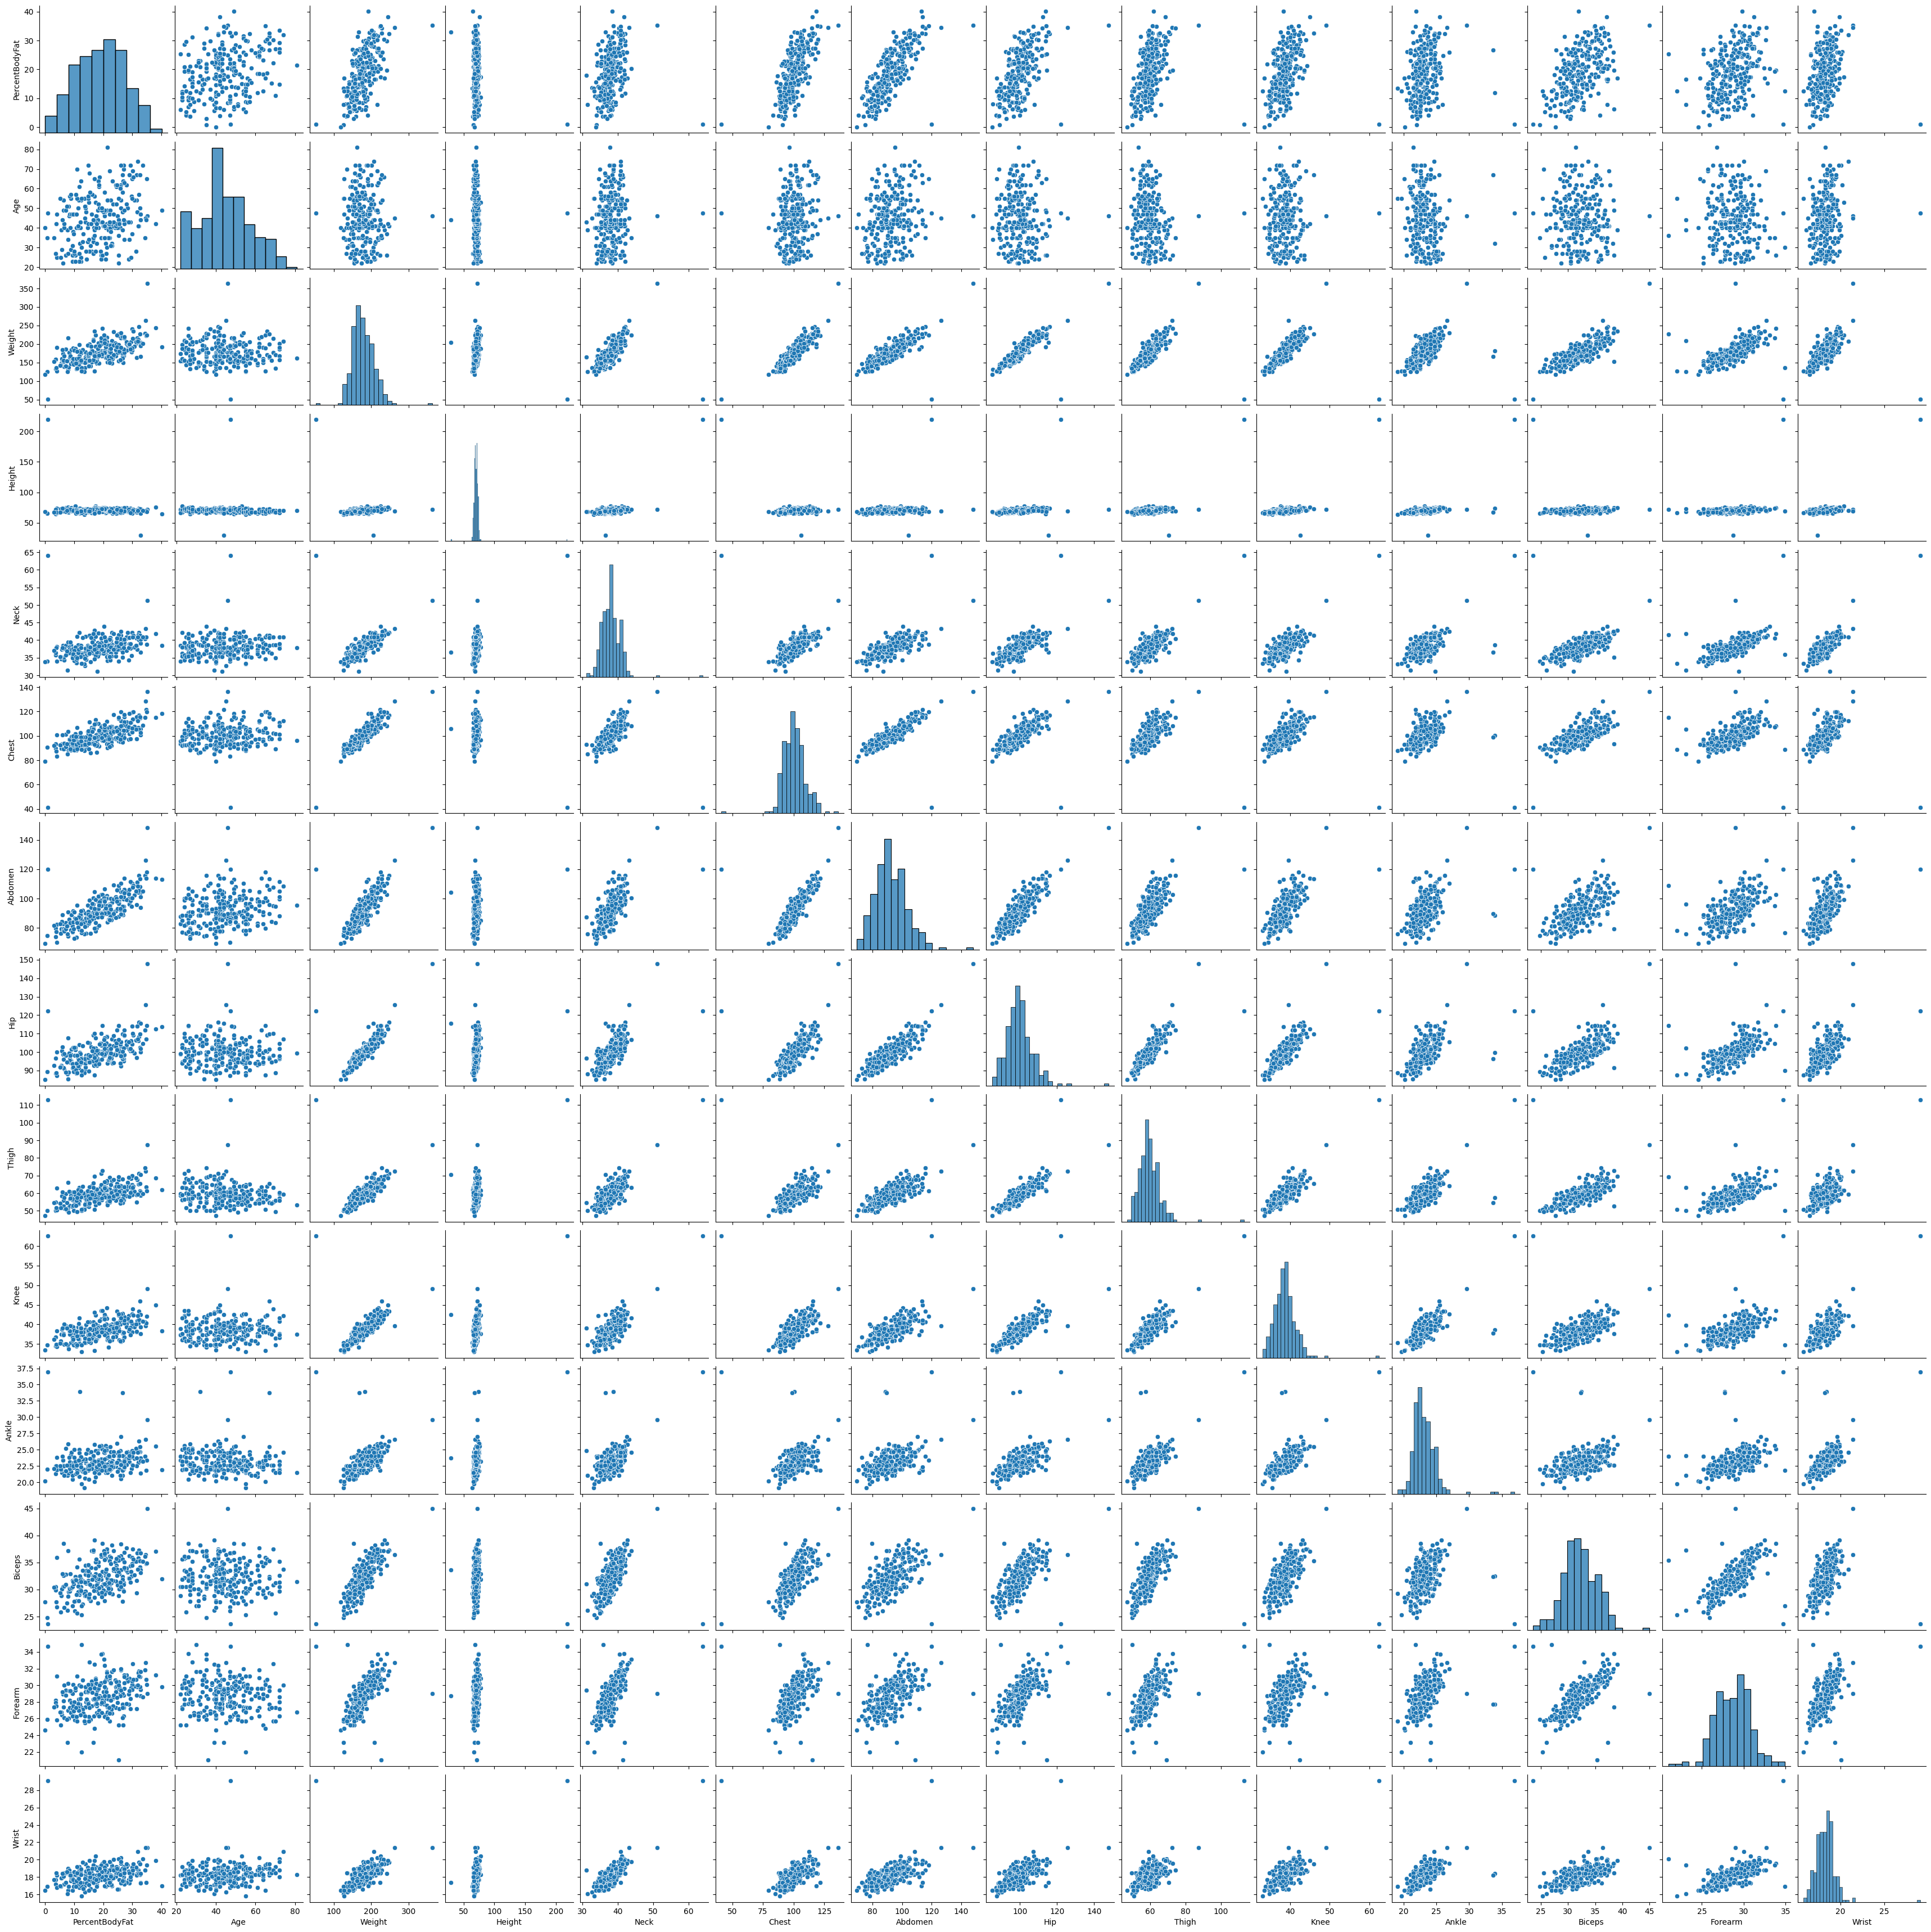

In [5]:
#EDA & Cleaning

sns.pairplot(data=df)
plt.show()

^ We can see that most of the plots look "*zoomed out*", thats because of the **outliers** present.

We'll remove them shortly after.

In [192]:
df.describe()

PercentBodyFat         Age      Weight      Height        Neck  \
count       252.00000  252.000000  252.000000  252.000000  252.000000   
mean         18.96625   44.871032  178.257738   70.763889   38.082540   
std           8.25306   12.597201   30.365700   10.057816    2.924892   
min           0.00000   22.000000   51.000000   29.500000   31.100000   
25%          12.40000   35.750000  158.187500   68.250000   36.400000   
50%          19.20000   43.000000  176.125000   70.125000   38.000000   
75%          25.22500   54.000000  196.812500   72.250000   39.425000   
max          40.10000   81.000000  363.150000  219.000000   64.000000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.512302   92.546825   99.941667   59.605556   38.692063   23.155159   
std      9.148999   10.758917    7.254138    6.232345    2.841233    1.904559   
min     41.200000   69.400000   85.000000   47.200000   33.000000   19.100000   
25%     94.150000   84.575000   95.500000   56.000000   37.075000   22.000000   
50%     99.600000   90.950000   99.300000   59.000000   38.500000   22.800000   
75%    105.300000   99.325000  103.525000   62.400000   40.000000   24.000000   
max    136.200000  148.100000  147.700000  112.800000   62.500000   36.900000   

           Biceps     Forearm       Wrist  
count  252.000000  252.000000  252.000000  
mean    32.229365   28.686111   18.272222  
std      3.066334    2.055991    1.157765  
min     23.600000   21.000000   15.800000  
25%     30.200000   27.300000   17.600000  
50%     32.000000   28.700000   18.300000  
75%     34.300000   30.000000   18.800000  
max     45.000000   34.900000   29.100000

## Handling Irregularities in the Dataset

During data exploration, some anomalies were discovered in the dataset:

- A sample with **0% body fat**, which is **physiologically impossible**.
- **Body fat percentages below 5%**, which are extremely **unusual and potentially dangerous**.
  - Generally, **5% is the lower limit** for essential body fat in males.
  - These values are likely measurement or input errors.
- A sample with a **height of 219 inches (~5.56 meters)**, which suggests a unit conversion error (probably recorded in centimeters instead of inches).
- **Neck measurements appear to be in centimeters**, based on comparisons with real-world references.
  - Example: Mike Tyson’s neck circumference is **~50 cm (20 inches)**, while the dataset's **mean is 38 cm**, making it reasonable to assume the values are metric.

### **Data Cleaning Steps:**
- **Remove samples with body fat percentage below 5%.**
- **Automatically discard the extreme height entry (219 inches) in the process.**
- **Ensure unit consistency for neck measurements if necessary.**


In [358]:
df = df[df.Weight > 110] # Getting rid of anything that is not on the same measurment system (By assuming anything under 110 is refering to kg instead of lbs, most males weigh at least 110lbs)
df = df[df.PercentBodyFat > 5] # Getting rid of potentially incorrect data or just outliers

# Converting everything from imperial to metric
df['Weight'] = df.Weight / 2.205
df['Height'] = df.Height * 2.54


df.drop_duplicates(inplace = True) # Doing this for good measure
df.describe()

PercentBodyFat         Age      Weight      Height        Neck  \
count      243.000000  243.000000  243.000000  243.000000  243.000000   
mean        19.569547   45.193416   81.606898  178.403642   38.049383   
std          7.766892   12.618678   13.059170    9.281659    2.417128   
min          5.200000   22.000000   56.689342   74.930000   31.100000   
25%         13.550000   37.000000   72.619048  173.990000   36.400000   
50%         19.500000   44.000000   80.272109  178.435000   38.000000   
75%         25.300000   54.000000   89.569161  183.515000   39.500000   
max         40.100000   81.000000  164.693878  197.485000   51.200000   

           Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  243.00000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean   101.11358   92.969547  100.146091   59.610700   38.702058   23.135391   
std      8.17237   10.361957    7.007589    5.137205    2.367627    1.705576   
min     85.10000   72.800000   85.300000   49.300000   33.000000   19.100000   
25%     95.40000   86.000000   95.700000   56.350000   37.300000   22.000000   
50%     99.80000   91.600000   99.300000   59.100000   38.600000   22.900000   
75%    105.60000   99.750000  103.650000   62.500000   40.000000   24.000000   
max    136.20000  148.100000  147.700000   87.300000   49.100000   33.900000   

           Biceps     Forearm       Wrist  
count  243.000000  243.000000  243.000000  
mean    32.364198   28.706996   18.255144  
std      2.966882    2.014614    0.931721  
min     25.300000   21.000000   15.800000  
25%     30.300000   27.300000   17.600000  
50%     32.100000   28.800000   18.300000  
75%     34.350000   30.000000   18.800000  
max     45.000000   34.900000   21.400000

## Data Cleaning Summary

After applying the necessary filters:

- **9 samples were removed** due to unrealistic or incorrect values.
- **All measurements are now in metric units** for consistency.

---

### **Next Step: Detecting Outliers**
Now that our dataset is cleaned, the next step is to **identify and handle outliers** to ensure a more robust model.


<Axes: ylabel='Ankle'>

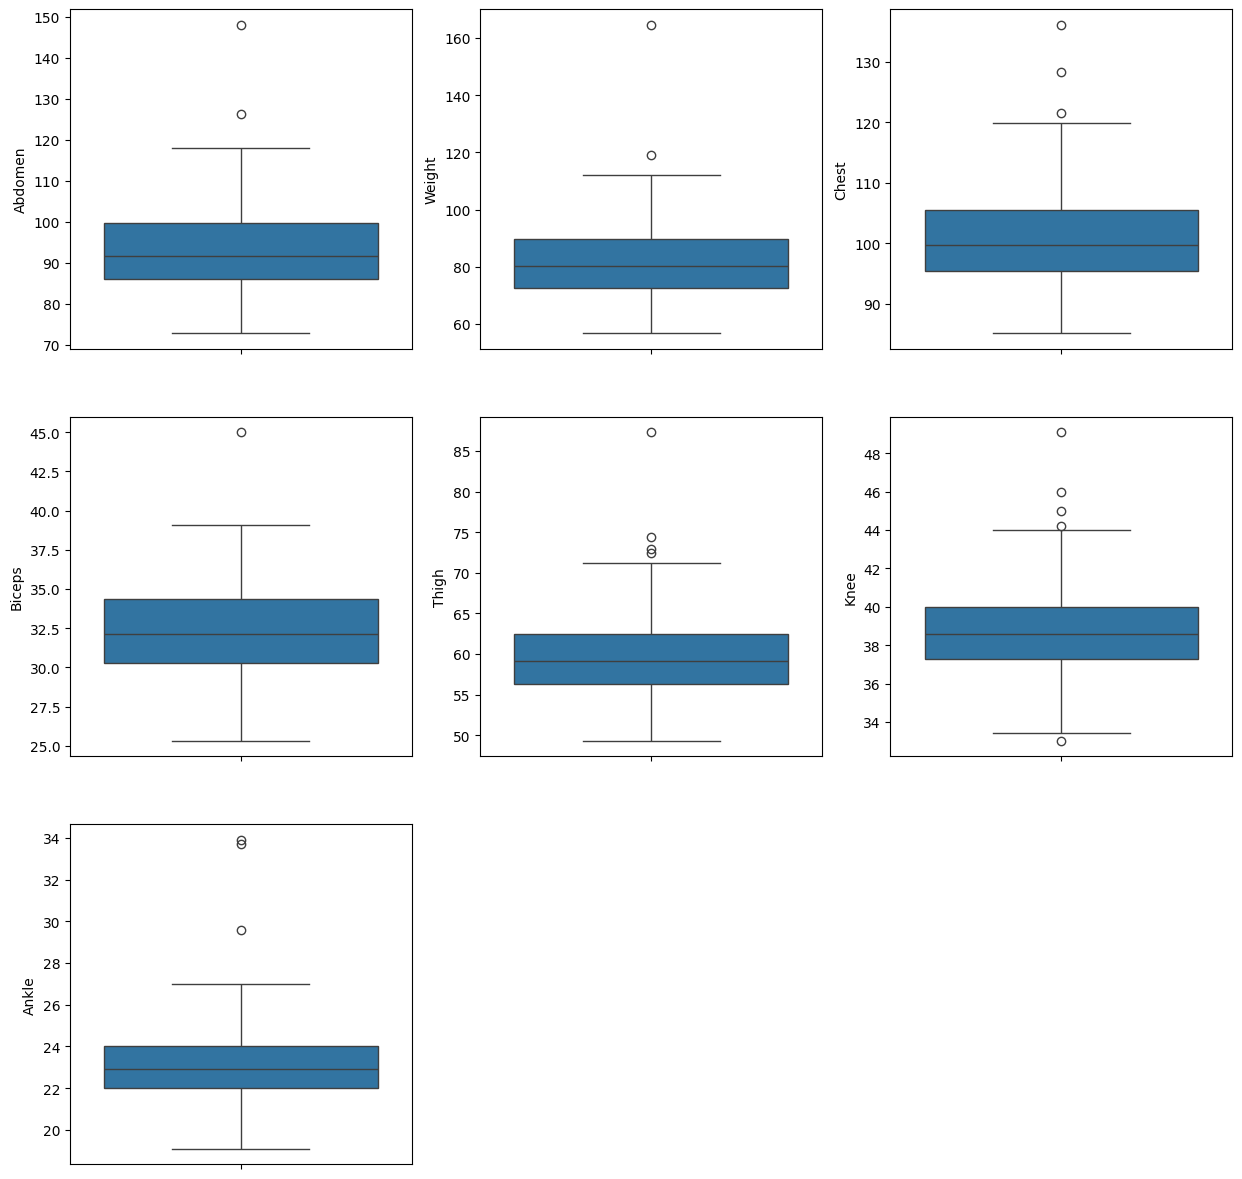

In [251]:
# Detect outliers
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(df['Abdomen'])

plt.subplot(3,3,2)
sns.boxplot(df['Weight'])

plt.subplot(3,3,3)
sns.boxplot(df['Chest'])

plt.subplot(3,3,4)
sns.boxplot(df['Biceps'])

plt.subplot(3,3,5)
sns.boxplot(df['Thigh'])

plt.subplot(3,3,6)
sns.boxplot(df['Knee'])

plt.subplot(3,3,7)
sns.boxplot(df['Ankle'])

### **Removing Outliers**

The points marked as outliers in our visualizations indicate extreme values that could **skew our model's performance** if left unaddressed.  

To ensure a more **accurate and reliable prediction**, we will now remove these outliers from our dataset.


In [311]:
# Helper function:
def removal_box_plot(df, column, threshold):
    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

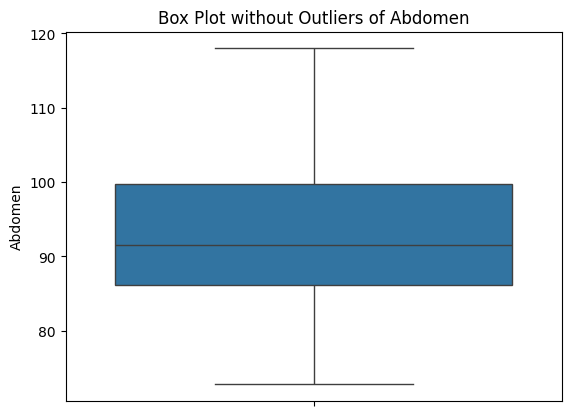

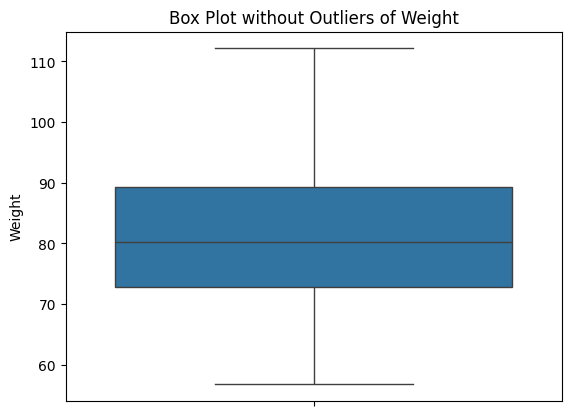

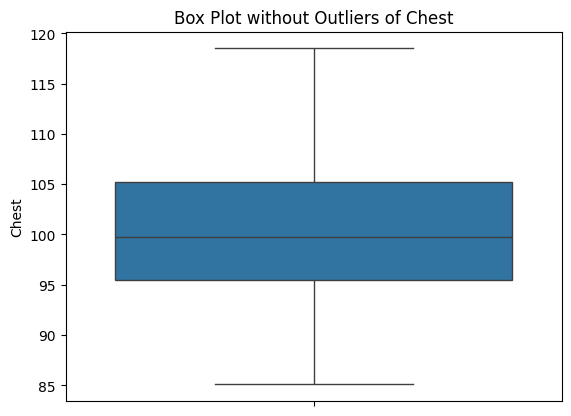

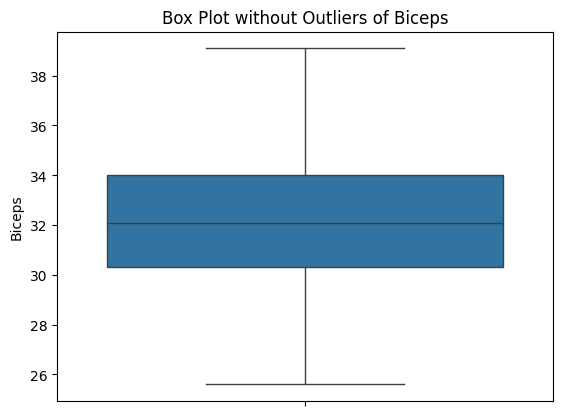

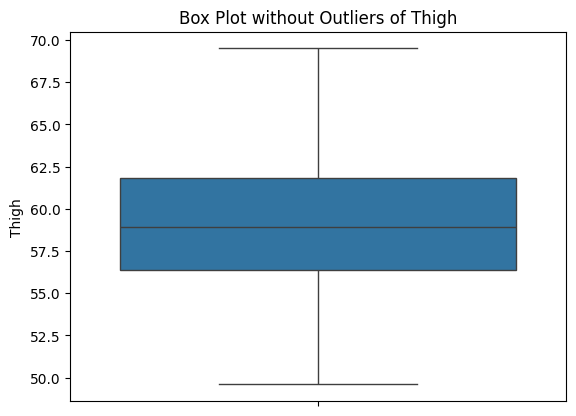

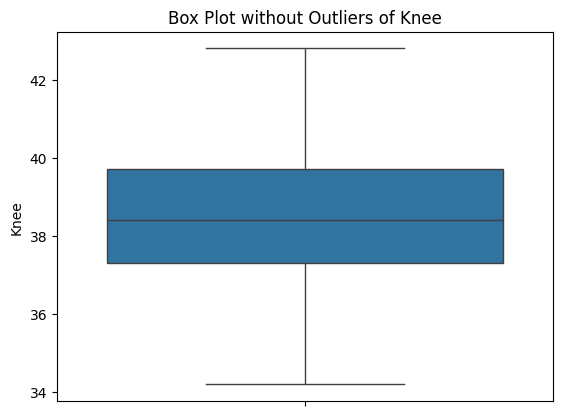

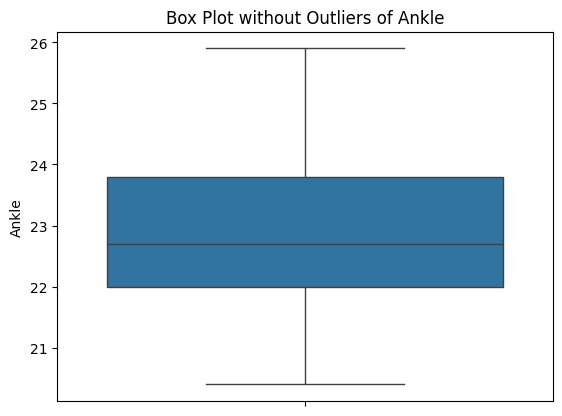

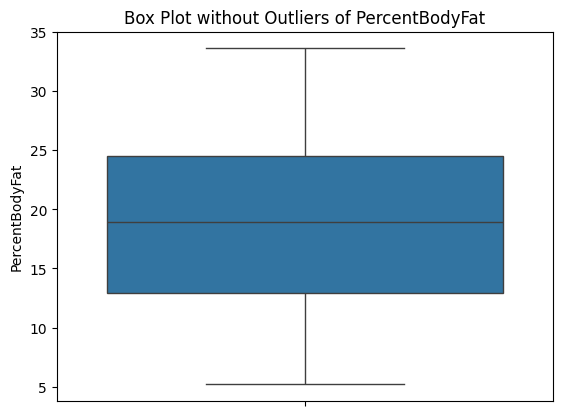

In [359]:
# Under the threshold outliers, no function for them
df = df[df['Knee'] >= 34]
df = df[df['Ankle'] >= 20]

# Over the threshold outliers
df = removal_box_plot(df, 'Abdomen', 120)
df = removal_box_plot(df, 'Weight', 115)
df = removal_box_plot(df, 'Chest', 119)
df = removal_box_plot(df, 'Biceps', 40)
df = removal_box_plot(df, 'Thigh', 70)
df = removal_box_plot(df, 'Knee', 43)
df = removal_box_plot(df, 'Ankle', 26)
df = removal_box_plot(df, 'PercentBodyFat', 35)

### **Scaling the Data**

One other thing we should do is to **Scale** the data.

Make sure all features (e.g., height, weight, age) are on the same scale.  

Why? e.g. A feature like **salary** (ranging from 0–100,000) could dominate **age** (0–100), which would **bias the model** and make it harder to interpret the results correctly.  

By standardizing or normalizing our dataset, we bring all features to a **comparable scale**, improving the performance and stability of our model.

In [313]:
df.describe()

PercentBodyFat         Age      Weight      Height        Neck  \
count      218.000000  218.000000  218.000000  218.000000  218.000000   
mean        18.797706   44.866972   79.872787  178.769977   37.841284   
std          7.212856   12.553506   10.067272    6.238754    2.135597   
min          5.200000   22.000000   56.802721  166.370000   31.100000   
25%         12.925000   36.000000   72.448980  173.990000   36.325000   
50%         18.950000   43.000000   79.308390  178.117500   37.900000   
75%         24.475000   54.000000   87.273243  183.515000   39.175000   
max         33.600000   81.000000  105.555556  197.485000   43.900000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  218.000000  218.000000  218.000000  218.000000  218.000000  218.000000   
mean   100.037615   91.583028   99.172018   59.026147   38.424312   22.933486   
std      6.792857    8.463254    5.204376    4.155492    1.916988    1.176744   
min     85.100000   72.800000   85.300000   49.600000   34.200000   20.400000   
25%     94.950000   85.625000   95.600000   56.300000   37.225000   22.000000   
50%     99.450000   90.800000   99.150000   58.900000   38.400000   22.750000   
75%    104.450000   98.075000  102.400000   61.500000   39.700000   23.800000   
max    118.300000  113.800000  114.400000   69.200000   42.800000   25.900000   

           Biceps     Forearm       Wrist  
count  218.000000  218.000000  218.000000  
mean    32.080734   28.594495   18.209633  
std      2.688839    1.882534    0.851699  
min     25.600000   21.000000   16.100000  
25%     30.225000   27.300000   17.600000  
50%     31.800000   28.650000   18.250000  
75%     33.800000   29.875000   18.800000  
max     38.500000   34.900000   20.900000

### **Key Metrics for Estimating Body Fat %**

Some obvious metrics that will help us on this **"quest"** are **height** and **weight**.  

Their relationship can provide a rough estimate of someone's **BF%**, as they are fundamental indicators of body composition.  

So let's dive into that:


In [360]:
df['BMI']=10000*(df['Weight']/(df['Height'])/(df['Height'])) # Formula for metric BMI
df.head()

PercentBodyFat   Age     Weight   Height  Neck  Chest  Abdomen    Hip  \
0            12.3  23.0  69.954649  172.085  36.2   93.1     85.2   94.5   
1             6.1  22.0  78.571429  183.515  38.5   93.6     83.0   98.7   
2            25.3  22.0  69.841270  168.275  34.0   95.8     87.9   99.2   
3            10.4  26.0  83.786848  183.515  37.4  101.8     86.4  101.2   
4            28.7  24.0  83.560091  180.975  34.4   97.3    100.0  101.9   

   Thigh  Knee  Ankle  Biceps  Forearm  Wrist        BMI  
0   59.0  37.3   21.9    32.0     27.4   17.1  23.622755  
1   58.7  37.3   23.4    30.5     28.9   18.2  23.330364  
2   59.6  38.9   24.0    28.8     25.2   16.6  24.664535  
3   60.1  37.3   22.8    32.4     29.4   18.2  24.878988  
4   63.2  42.2   24.0    32.2     27.7   17.7  25.513012

In [361]:
# Define feature names
# Preserve the order for easier understanding later on
feature_names = ['Age', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle',
                 'Biceps', 'Forearm', 'Wrist', 'BMI']

In [362]:
# Extract feature values and target variable
X_full = np.array(df[feature_names])

# Apply Standard Scaling (excluding constant)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Convert back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

# Add the unscaled target variable as the first column
X_scaled_df.insert(0, 'PercentBodyFat', df['PercentBodyFat'].values)

The Standardization of the data will help us avoid a large Condition Number, which renders the model useless if large.

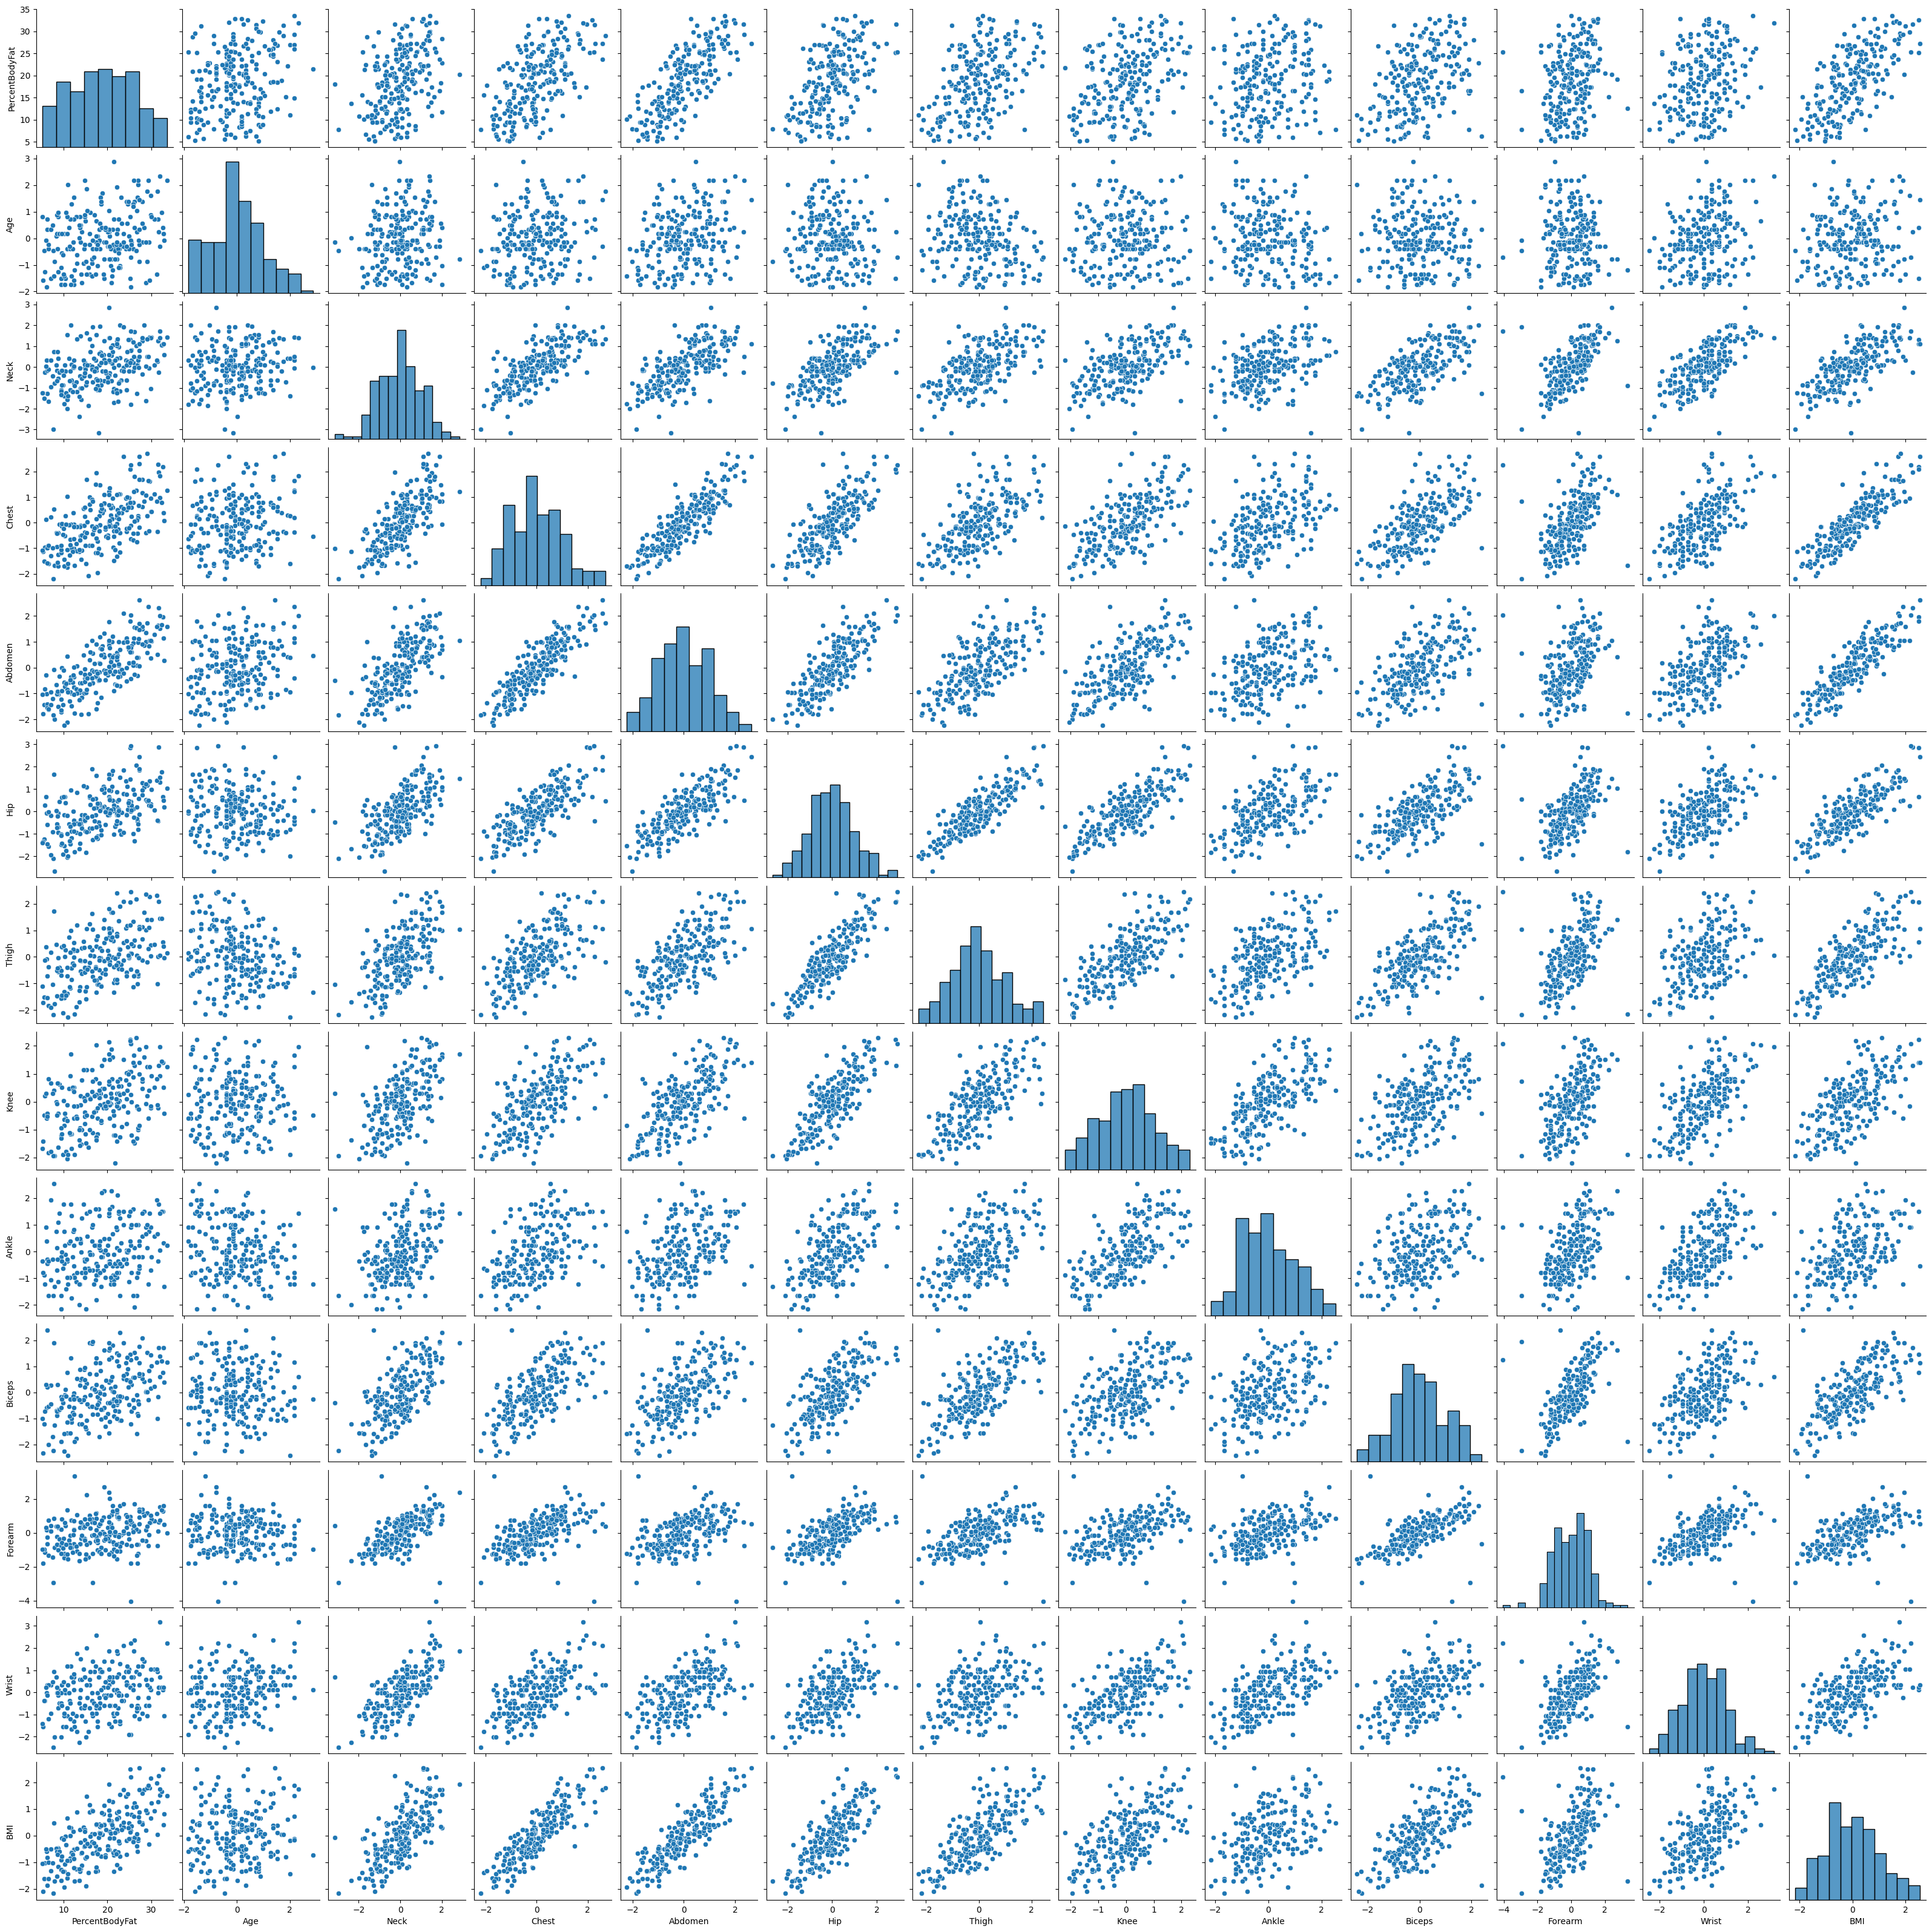

In [264]:
sns.pairplot(data=X_scaled_df)
plt.show()

### **Improved Data Distribution**

The data looks **better** now!  

If you **consult the plot** at *(PercentBodyFat, Abdomen)*, you can observe a **positive correlation** between these two variables. This suggests that **Abdomen circumference** could be a strong predictor of **Body Fat Percentage (BF%)**.


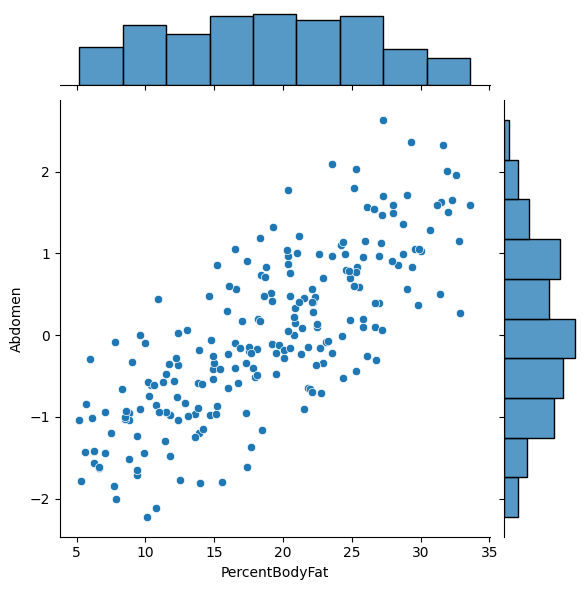

In [201]:
sns.jointplot(x = "PercentBodyFat", y = "Abdomen", data = X_scaled_df)
    # jointplot makes a scatter plot that puts a point in for each observation and histograms for each attribute
    # alpha makes it so that each point has an opacity of 0.5 therefore everytime one is stacked on top of the other we can see concentration

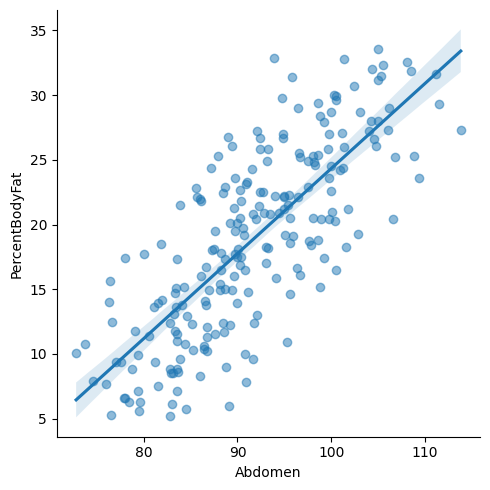

In [269]:
sns.lmplot(x = 'Abdomen',
          y = 'PercentBodyFat',
          data = df,
          scatter_kws = {"alpha" : 0.5})

# 4. Model Building

In [317]:
# Testing if 'Abdomen' can predict bf% with any certanty

X = X_scaled_df['Abdomen']
X = np.array(X).reshape(-1,1) # this step is a must / the model likes data a certain way

y = X_scaled_df['PercentBodyFat']

model = LinearRegression().fit(X, y)
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5955559831490974


### **Optimizing the Model Selection**

This returns a **pretty good result**, but we could **extrapolate further insights** from the graph to determine which attributes to add to the model.  

However, doing this **manually** would be **cumbersome**.  

Instead, let's **automate** the process by testing **every possible combination** of features and selecting the **best-performing** model!


In [375]:
# Extract feature values and target variable
X_full = np.array(X_scaled_df[feature_names])
y = np.array(df['PercentBodyFat'])  # Target variable

# Add constant column for intercept
X_full = smt.add_constant(X_full)

# Generate all possible feature combinations
best_model = None
best_adj_r2 = -np.inf  # Track the best model by adjusted R^2

for r in range(1, len(feature_names) + 1):
    for combo in itertools.combinations(range(len(feature_names)), r):
        selected_features = list(combo)  # Indices of selected features
        X = X_full[:, [0] + [i + 1 for i in selected_features]]  # Include constant and place in begining

        # Split into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Turns out 42 is the answer to everything!?

        # Train model
        model = smt.OLS(y_train, X_train)
        results = model.fit()

        # Check adjusted R²
        if results.rsquared_adj > best_adj_r2:
            best_adj_r2 = results.rsquared_adj
            best_model = (results, [feature_names[i] for i in selected_features])


# Print the best model
print("\n=== Best Model Based on Adjusted R² ===")
print(f"Features used: {', '.join(best_model[1])}")
print(best_model[0].summary())


=== Best Model Based on Adjusted R² ===
Features used: Age, Neck, Chest, Abdomen, Forearm, Wrist, BMI
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     42.65
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           4.15e-32
Time:                        23:11:23   Log-Likelihood:                -427.54
No. Observations:                 152   AIC:                             871.1
Df Residuals:                     144   BIC:                             895.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

# === Best Model Based on Adjusted R² ===

Features used: Age, Neck, Chest, Abdomen, Forearm, Wrist, BMI

R²= 0.659

Cond.No. = 6.82

In [372]:
# Define the selected features
selected_features = ['Age', 'Neck', 'Chest', 'Abdomen', 'Forearm', 'Wrist', 'BMI']

# Extract feature values and target variable
X = np.array(X_scaled_df[selected_features])  # Use only the selected features
y = np.array(df['PercentBodyFat'])  # Target variable

# Add constant column for intercept
X = smt.add_constant(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = smt.OLS(y_train, X_train)
model = model.fit()

# Print results
print("\n=== Model Summary ===")
print(f"Features used: {', '.join(selected_features)}")
print(model.summary())



=== Model Summary ===
Features used: Age, Neck, Chest, Abdomen, Forearm, Wrist, BMI
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     42.65
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           4.15e-32
Time:                        23:01:52   Log-Likelihood:                -427.54
No. Observations:                 152   AIC:                             871.1
Df Residuals:                     144   BIC:                             895.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [325]:
predictions = model.predict(X_test)

# This is me doing cross-validation
print(predictions)
print(y_test)

[15.89334502 36.57124702 28.86437796 15.28005081 25.11412396 22.99009133
 22.51672652 13.25558323 21.61654396 16.25228982 12.22271231 22.97302866
 28.63627412  8.98572823 17.67885996 26.41406378  7.77050993 24.35948855
  9.97131033 22.06023116 18.57244236 11.98637473 16.53484371 15.83539556
 18.51345832 28.84790454 16.6042614  20.10849719 27.12844862 17.50594867
 15.18108361 11.08972557 14.48020629 18.73037758 17.05824527 13.32948859
 23.42759532 16.48565023 16.56740789 17.25455205 29.34796628 24.23419478
 19.53518565 11.02984473 19.66252038 19.8679598  22.75503505 23.08431187
 20.60914302 23.23290873 15.75404444 16.50322265  8.40849288 11.4727709
 36.2999935  25.58288558 21.12109518 19.4447247  18.41005368 17.50341026
 22.34869474 17.98296995 21.74408076 15.33301318 18.3489824   6.13461629]
[16.7 29.3 31.2  6.  29.  25.3 25.5  8.3 24.8 10.  13.6 28.4 29.   7.1
 26.8 28.7  6.6 16.5  9.9 31.4 15.   9.4  9.  22.9 20.8 27.3 22.1 22.9
 31.5 20.5 13.8  6.3 11.  11.5 16.   8.6 20.5 16.5 24.4

In [326]:
print("Absolute Mean Error: ", mean_absolute_error(y_test, predictions))
print("Squared Mean Error: ", mean_squared_error(y_test, predictions))
print("Root Squared Mean Error: ", math.sqrt(mean_squared_error(y_test, predictions)) )

Absolute Mean Error:  3.555727076353437
Squared Mean Error:  19.35362305136831
Root Squared Mean Error:  4.399275287063576


In [374]:
model_path = '/content/drive/MyDrive/Artificial_intelligence/model.joblib'

# Save the model to Google Drive
joblib.dump(model, model_path)

# presumably this only works on google colab

['/content/drive/MyDrive/Artificial_intelligence/model.joblib']

Overall, the model is decent, given the size of the dataset after cleaning. This is the best model I could come up with so far, but I will explore different methods below just to rule them out.

---

### Principal Component Analysis (PCA)


In [139]:
# feature_names = ['Age', 'Weight', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Forearm', 'Wrist']
# Optionally try only these, but it doesnt work any better

In [336]:
# Importing the dataset
dataset = "/content/drive/MyDrive/Artificial_intelligence/PercentBodyFat.xlsx"

# Read dataset to pandas dataframe
df = pd.read_excel(dataset)
df.head()

df['BMI']=10000*(df['Weight']/(df['Height'])/(df['Height'])) # Formula for metric BMI
df = df.drop(columns = ['Height', 'Weight'])
# checking shape
print('Original Dataframe shape :',df.shape)

# Input features
X = df[feature_names]
print('Inputs Dataframe shape   :', X.shape)

Original Dataframe shape : (252, 13)
Inputs Dataframe shape   : (252, 12)


In [337]:
# Input features
X = df[feature_names]
print('Inputs Dataframe shape   :', X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = smt.add_constant(X_scaled)

# Convert back to a DataFrame
X = pd.DataFrame(X_scaled, columns=feature_names)

Inputs Dataframe shape   : (252, 12)


In [338]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std

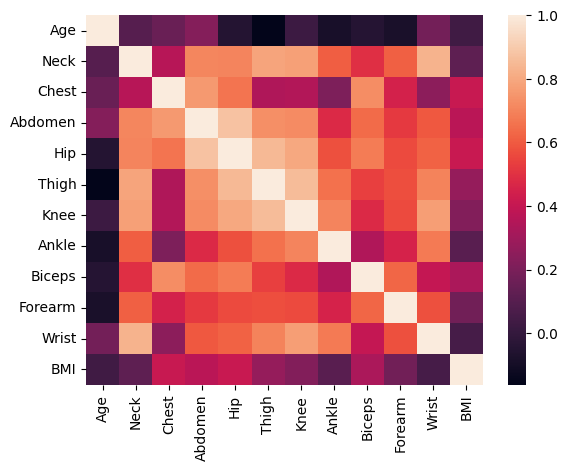

In [339]:
# covariance
c = Z.cov()

sns.heatmap(c)
plt.show()

In [340]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [6.61901259 1.59245978 1.17549706 0.80065536 0.52786648 0.41548673
 0.25592508 0.22155183 0.15242564 0.11513563 0.05763983 0.06634399]
Eigen values Shape: (12,)
Eigen Vector Shape: (12, 12)


In [341]:
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

In [342]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.55158438, 0.68428936, 0.78224745, 0.84896873, 0.89295761,
       0.9275815 , 0.94890859, 0.96737124, 0.98007338, 0.98966802,
       0.99519668, 1.        ])

In [343]:
n_components = np.argmax(explained_var >= 0.60) + 1
n_components

np.int64(2)

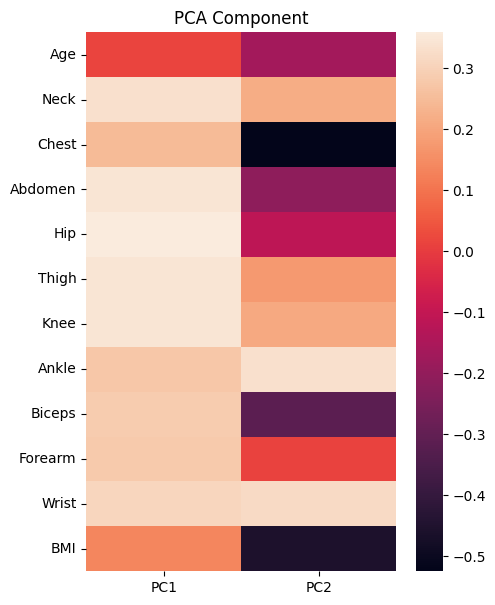

In [344]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = feature_names,
                             columns = ['PC1','PC2']
                            )

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [345]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

         PCA1      PCA2
0   -1.862753  0.262176
1   -0.897037  1.127688
2   -1.911542  0.462315
3   -0.309213  0.088079
4    0.252258  0.372855
..        ...       ...
247 -3.756305  0.525711
248  2.243695 -0.719506
249  0.433034 -1.868582
250  0.954976 -0.304501
251  3.208608 -0.397774

[252 rows x 2 columns]


In [346]:
y = df['PercentBodyFat']

In [347]:
X_train, X_test, y_train, y_test = train_test_split(Z_pca, y, test_size=0.3, random_state=42)

In [348]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [349]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 25.61812178115324
R² Score: 0.5050767539090366


PCA was not very succesful.


---


# Here is RandomForestRegressor:

In [350]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R² Score: {r2_rf}")

Random Forest R² Score: 0.44878797489566136


In [369]:
# with these features only: Age, Neck, Chest, Abdomen, Forearm, Wrist, BMI
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R² Score: {r2_rf}")

# If you wonder how I made this only with these features
# The answer is by running the cells in a non-linear fashion

Random Forest R² Score: 0.6039494015692461


# Let us try ridge regression:

In [354]:
# lettuce try ridge regression
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
model = clf.fit(X_train, y_train)
model.score(X_train, y_train)

0.549903127763694

In [352]:
predictions = model.predict(X_test)
print("Absolute Mean Error: ", mean_absolute_error(y_test, predictions))
print("Squared Mean Error: ", mean_squared_error(y_test, predictions))
print("Root Squared Mean Error: ", math.sqrt(mean_squared_error(y_test, predictions)) )

Absolute Mean Error:  4.199522330300911
Squared Mean Error:  25.617820368812463
Root Squared Mean Error:  5.06140497972771


In [368]:
# ridge regression again
# with these features only: Age, Neck, Chest, Abdomen, Forearm, Wrist, BMI
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
model = clf.fit(X_train, y_train)
model.score(X_train, y_train)

0.6744036512699637

In [366]:
predictions = model.predict(X_test)
print("Absolute Mean Error: ", mean_absolute_error(y_test, predictions))
print("Squared Mean Error: ", mean_squared_error(y_test, predictions))
print("Root Squared Mean Error: ", math.sqrt(mean_squared_error(y_test, predictions)) )

Absolute Mean Error:  3.5505459657923724
Squared Mean Error:  19.26628842910253
Root Squared Mean Error:  4.389338039967135
